In [14]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

#
# Gyms have an action space and observation space.
#
# The action space is the "set of actions" an agent can take.  In our example the agent can put their
# 'mark' on one of 9 spaces at a time.
#
# The observation space is a "Box", which is an OpenAI Gym construct.  The observation is a 1D array of length 9,
# and each element can be -1 (O), 0 (nothing played), or 1 (X)
#

class TicTacToeEnv(gym.Env):
        
    def __init__(self):
        # Define the action and observation space
        # We'll use a 1D action space where each of the 9 actions corresponds to a board position

        # 0 1 2
        # 3 4 5 --> 0 1 2 3 4 5 6 7 8
        # 6 7 8
        self.action_space = gym.spaces.Discrete(9)
        
        # The observation will be a 1D array of length 9. Each entry can be -1 (O), 0 (empty), or 1 (X)
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(9,), dtype=np.int8)

        # We don't know who will be O or X until told by reset()
        self.player   = 0
        self.computer = 0

    # Create a board with all zeros (no one has played) and set the player.  The computer will be opposite.
    # Default is player to be X
    def reset(self, player=1, policy=None, debug=False):
        self.board = np.zeros(9, dtype=np.int8)
        self.policy   = policy
        self.player   =  player
        self.computer = -player

        # Return the board, which is shape(9,) of zeros
        
        return self.board,{}

    
    # Actions are where to put the mark of the player
    def step(self, action):

        info   = {'result':None}
        reward = 0
        done   = False

        # The move has to be valid, i.e., the location of the board available
        if self.board[action] == 0:
            
            self.board[action] = self.player

            # If there is a win, we are done
            if self.check_win():
                info['result'] = 'win'
                done           = True
                reward         = 1
            elif self.check_draw():
                info['result'] = 'draw'
                done           = True

            if done:    
                return self.board, reward, done, info
            else:
                reward, done = self.__computer_action()
                if reward < 0:
                    info['result'] = 'loss'

                return self.board, reward, done, info
        else:
            # Invalid move, reward is -1, and we are done
            return self.board, -1000, True, {'result':'forfeit'}

    #
    # Computer plays - the computer cannot make an illegal move
    #
    def __computer_action(self):

        if self.policy is None:
            space_chosen = False
            
            while not space_chosen:
                action = np.random.randint(0,9)
    
                if self.board[action] == 0:
                    self.board[action] = self.computer
                    done = self.check_win() or self.check_draw()
                    reward = -1 if self.check_win() else 0
                    space_chosen = True
                    
            return reward, done
        else:
            action = self.policy(self.board)

            if self.board[action] == 0:
                self.board[action] = self.computer
                done = self.check_win() or self.check_draw()
                reward = -1 if self.check_win() else 0
                space_chosen = True

            return reward, done
                
        
    #
    # How this works:  'lines' is an array of consecutive indices of the board that if the same, are a win.
    #                  For example, 0, 3 6 is
    #
    #                  0 * *  
    #                  3 * * - if these values are the same, it is a win
    #                  6 * *
    #
    def check_win(self):
        # Check rows, columns, and diagonals for a win
        lines = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
        for line in lines:
            if self.board[line[0]] == self.board[line[1]] == self.board[line[2]] and self.board[line[0]] != 0:
                return True
        return False

    def check_draw(self):
        return (self.board != 0).all()

    #def render(self, mode='human'):
    #    symbols = {1: 'X', -1: 'O', 0: ' '}
    #    for i in range(0, 9, 3):
    #        print(' | '.join(symbols[x] for x in self.board[i:i+3]))
    #        if i < 6:
    #            print('---------')

    def render(self):
        # Create a figure and a set of subplots
        fig, ax = plt.subplots(figsize=(3, 3))  # make the figure smaller
        # Draw the grid lines
        ax.plot([1, 1], [0, 3], 'k-', lw=2)
        ax.plot([2, 2], [0, 3], 'k-', lw=2)
        ax.plot([0, 3], [1, 1], 'k-', lw=2)
        ax.plot([0, 3], [2, 2], 'k-', lw=2)
        
        # Set the ticks labels
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(axis=u'both', which=u'both', length=0)  # Hide tick marks
        
        # Plot the symbols on the board
        symbols = {1: '✘', -1: '❍', 0: ''}
        for i in range(9):
            ax.text((i % 3) + 0.5, 2 - (i // 3) + 0.5, symbols[self.board[i]], fontsize=36,
                    va='center', ha='center', fontweight='bold')
            # Place the cell number in the lower right corner of each cell
            ax.text((i % 3) + 0.95, 2 - (i // 3) + 0.05, str(i), fontsize=8,
                    va='bottom', ha='right')
        
        # Set axis limits and hide the axes
        ax.set_xlim(0, 3)
        ax.set_ylim(0, 3)
        ax.axis('off')
        
        # Show the plot
        plt.show()






Start game 0
Action:  2 , Observation:  [ 0  0  1  0  0  0  0  0 -1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  0 , Observation:  [ 1  0  1  0  0  0 -1  0 -1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  3 , Observation:  [ 1 -1  1  1  0  0 -1  0 -1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  1 , Observation:  [ 1 -1  1  1  0  0 -1  0 -1] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


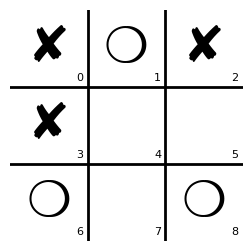

Start game 1
Action:  8 , Observation:  [ 0 -1  0  0  0  0  0  0  1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  0 , Observation:  [ 1 -1  0  0  0 -1  0  0  1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  5 , Observation:  [ 1 -1  0  0  0 -1  0  0  1] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


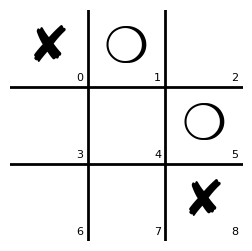

Start game 2
Action:  1 , Observation:  [ 0  1 -1  0  0  0  0  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  0 , Observation:  [ 1  1 -1  0  0  0  0 -1  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  3 , Observation:  [ 1  1 -1  1 -1  0  0 -1  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  4 , Observation:  [ 1  1 -1  1 -1  0  0 -1  0] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


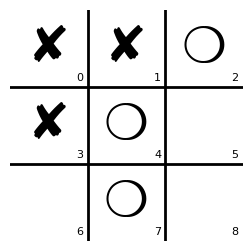

Start game 3
Action:  0 , Observation:  [ 1  0  0  0  0 -1  0  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  4 , Observation:  [ 1  0  0  0  1 -1  0 -1  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  7 , Observation:  [ 1  0  0  0  1 -1  0 -1  0] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


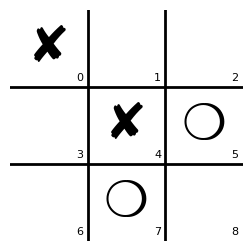

Start game 4
Action:  8 , Observation:  [ 0  0  0  0  0  0 -1  0  1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  6 , Observation:  [ 0  0  0  0  0  0 -1  0  1] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


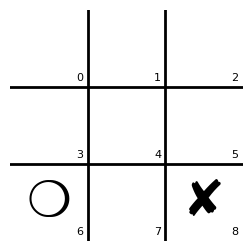

Start game 5
Action:  2 , Observation:  [ 0 -1  1  0  0  0  0  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  0 , Observation:  [ 1 -1  1  0 -1  0  0  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  6 , Observation:  [ 1 -1  1  0 -1  0  1 -1  0] , Reward:  -1 , Done:   True , Info: {'result': 'loss'}


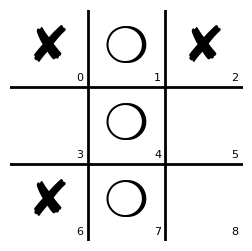

Start game 6
Action:  1 , Observation:  [ 0  1  0  0  0  0  0  0 -1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  3 , Observation:  [ 0  1  0  1  0  0  0 -1 -1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  2 , Observation:  [ 0  1  1  1 -1  0  0 -1 -1] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  1 , Observation:  [ 0  1  1  1 -1  0  0 -1 -1] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


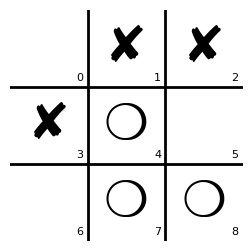

Start game 7
Action:  4 , Observation:  [ 0 -1  0  0  1  0  0  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  3 , Observation:  [ 0 -1  0  1  1  0 -1  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  3 , Observation:  [ 0 -1  0  1  1  0 -1  0  0] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


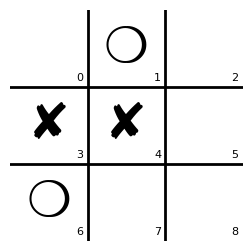

Start game 8
Action:  1 , Observation:  [ 0  1  0  0  0  0 -1  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  6 , Observation:  [ 0  1  0  0  0  0 -1  0  0] , Reward:  -1000 , Done:   True , Info: {'result': 'forfeit'}


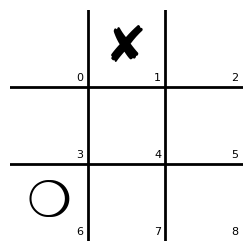

Start game 9
Action:  6 , Observation:  [ 0 -1  0  0  0  0  1  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  2 , Observation:  [-1 -1  1  0  0  0  1  0  0] , Reward:  0 , Done:   False , Info: {'result': None}
Action:  4 , Observation:  [-1 -1  1  0  1  0  1  0  0] , Reward:  1 , Done:   True , Info: {'result': 'win'}


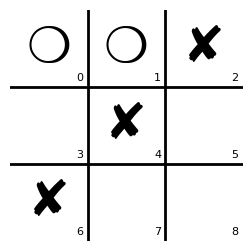

In [18]:
def policy(board):

    value = -1
    # This creates a boolean mask of where your value matches
    mask = board == value

    # np.argmax will return the first index where the mask is True
    idx = np.argmax(mask)
    action = (idx+1) % 8

    while board[action] != 0:
        action +=1
        action = action % 8

    return action

env = TicTacToeEnv()

num_games=10
for episode in range(num_games):
    print(f"Start game {episode}")
    obs,info = env.reset()
    done = False
    while not done:
        action = np.random.randint(0,9)
        obs, reward, done, info = env.step(action)
        print("Action: ", action, ", Observation: ", obs, ", Reward: ", reward, ", Done:  ", done, ", Info:"  ,info)

    
    env.render()

        